## Изучение данных

Набор данных о зарплатах в сфере науки о данных содержит 11 столбцов, каждый из которых:

* work_year: год выплаты зарплаты.
* experience_level: уровень опыта работы в течение года
* employment_type: тип занятости для должности
* job_title: должность, в которой работал в течение года.
* salary: общая сумма выплаченной валовой заработной платы.
* salary_currency: валюта выплачиваемой заработной платы в соответствии с кодом валюты ISO 4217.
* salaryinusd: зарплата в долларах США
* employee_residence: основная страна проживания сотрудника в течение рабочего года в соответствии с кодом страны ISO 3166.
* remote_ratio: общий объем работы, выполненной удаленно
* company_location: страна расположения главного офиса или филиала работодателя
* company_size: среднее количество людей, работавших в компании в течение года

In [1]:
!pip install phik==0.12.4


import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None # полностью отображаем столбцы
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [34]:
df = pd.read_csv('data/ds_salaries.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [39]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [37]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [60]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(5)

job_title
Data Science Tech Lead      375000.000
Cloud Data Architect        250000.000
Data Lead                   212500.000
Data Analytics Lead         211254.500
Principal Data Scientist    198171.125
Name: salary_in_usd, dtype: float64

In [61]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True).head(5)

job_title
Power BI Developer                5409.00
Product Data Scientist            8000.00
Staff Data Analyst               15000.00
3D Computer Vision Researcher    21352.25
Autonomous Vehicle Technician    26277.50
Name: salary_in_usd, dtype: float64

In [48]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'FL' 'PT']
job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Databas

## Предобработка данных

1. Проверим пропущенные значения
2. Проверим дубликаты
3. Преобразуем данные

In [49]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [52]:
df.duplicated().sum()

1171

In [62]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Преобразования столбцов

Заменим верхний регистр на нижний в названии столбцов.

In [63]:
df.columns = df.columns.str.lower()

df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [65]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Визуализация

Необходимые исследования:

* Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?
* Влияет ли удаленная работа на зарплату? Есть ли корреляция?
* Зависит ли заработная плата от размера предприятия?
* Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?
* Оцените медианную зарплату для каждой должности.
* Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
* Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.
* Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?


### Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?

job_title
Head of Machine Learning          6.000000e+06
Principal Data Architect          3.000000e+06
Lead Machine Learning Engineer    2.548667e+06
Lead Data Scientist               9.284853e+05
Data Analytics Lead               9.225000e+05
BI Data Analyst                   8.366448e+05
Head of Data Science              7.037294e+05
Lead Data Analyst                 6.550000e+05
ML Engineer                       6.099979e+05
Product Data Analyst              4.120000e+05
Name: salary, dtype: float64


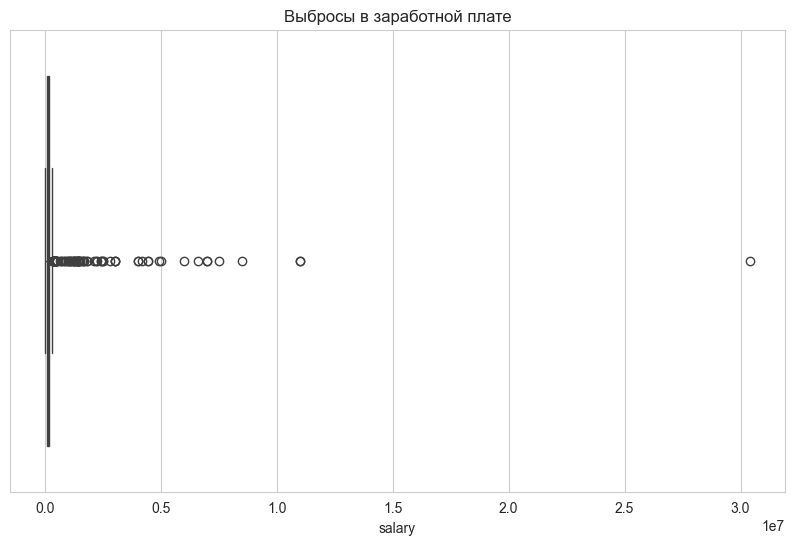

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Самые высокооплачиваемые должности
top_jobs = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).head(10)
print(top_jobs)

# Выбросы в зарплате
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', data=df)
plt.title('Выбросы в заработной плате')
plt.show()

### Влияет ли удаленная работа на зарплату? Есть ли корреляция?

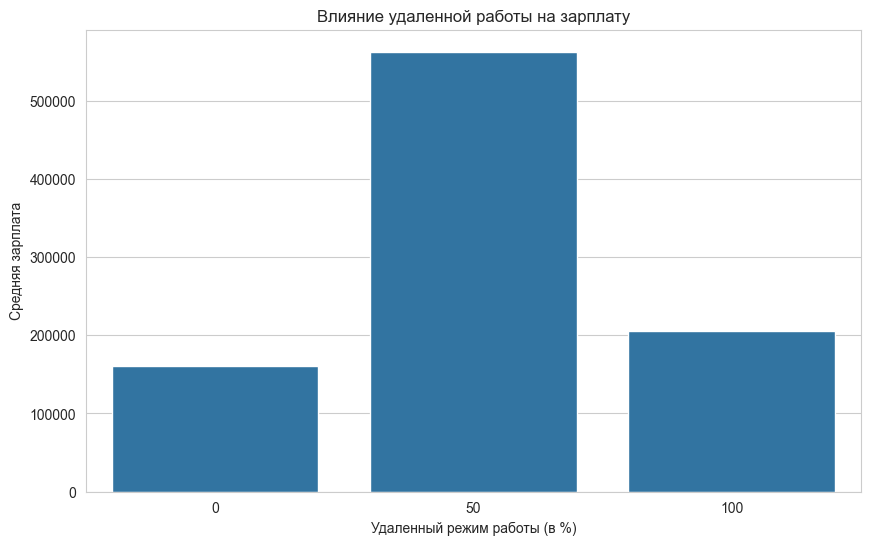

In [68]:
remote_salary = df.groupby('remote_ratio')['salary'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_salary.index, y=remote_salary.values)
plt.title('Влияние удаленной работы на зарплату')
plt.xlabel('Удаленный режим работы (в %)')
plt.ylabel('Средняя зарплата')
plt.show()

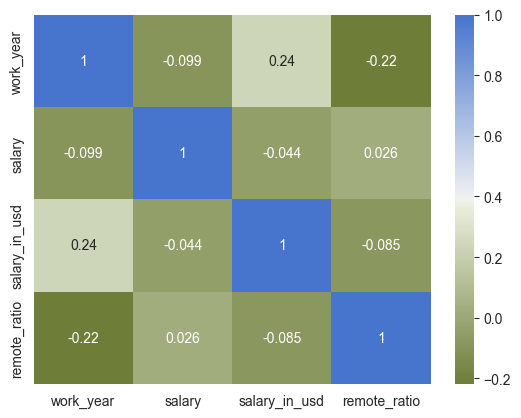

In [88]:
import matplotlib.pyplot as mp
import seaborn as sb

cmap = sns.diverging_palette(99, 256, n=256, as_cmap=True)
dataplot = sb.heatmap(df.corr(numeric_only=True), cmap=cmap, annot=True)
mp.show()

### Зависит ли заработная плата от размера предприятия?

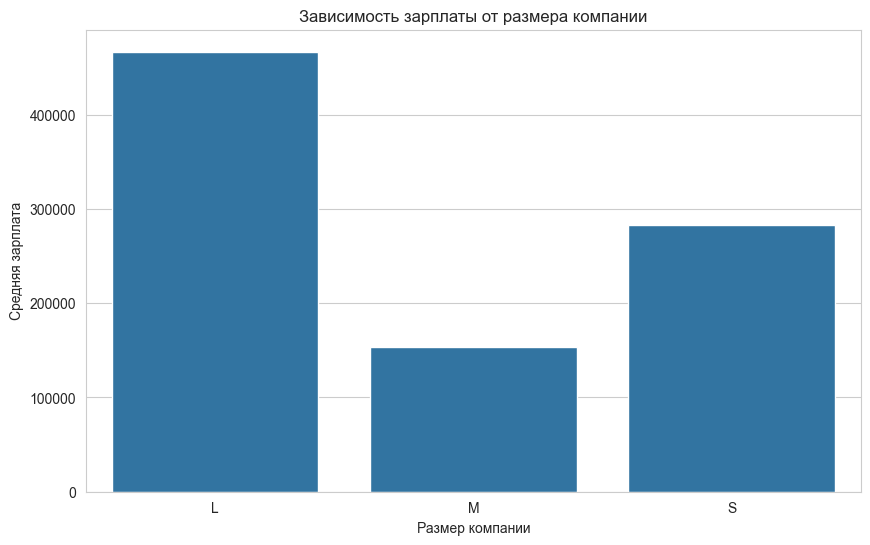

In [90]:
size_salary = df.groupby('company_size')['salary'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=size_salary.index, y=size_salary.values)
plt.title('Зависимость зарплаты от размера компании')
plt.xlabel('Размер компании')
plt.ylabel('Средняя зарплата')
plt.show()

### Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?

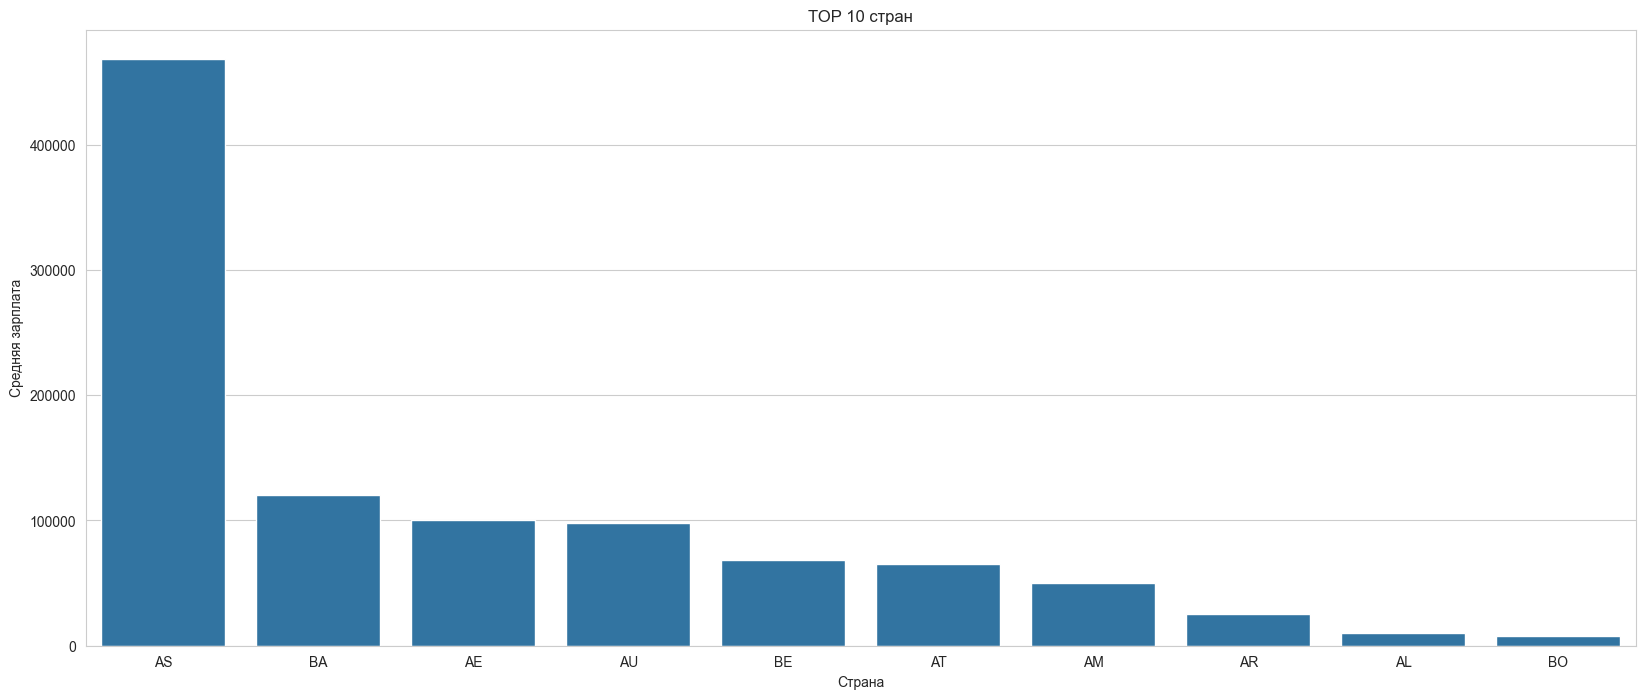

In [104]:
size_salary = df.groupby('company_location')['salary'].mean().head(10).sort_values(ascending=False)
plt.figure(figsize=(20, 8))
sns.barplot(x=size_salary.index, y=size_salary.values)
plt.title('TOP 10 стран')
plt.xlabel('Страна')
plt.ylabel('Cредняя зарплата')
plt.show()

### Оцените медианную зарплату для каждой должности. 

In [107]:
df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)

job_title
Data Science Tech Lead           375000.0
Cloud Data Architect             250000.0
Data Lead                        212500.0
Data Analytics Lead              211254.5
Head of Data                     202500.0
                                   ...   
Product Data Analyst              20000.0
Staff Data Analyst                15000.0
3D Computer Vision Researcher     15000.0
Product Data Scientist             8000.0
Power BI Developer                 5409.0
Name: salary_in_usd, Length: 93, dtype: float64

### Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?

work_year                   2020           2023
job_title                                      
AI Developer                 NaN  115252.875000
AI Programmer                NaN   70000.000000
AI Scientist             45896.0  231232.500000
Analytics Engineer           NaN  168110.487805
Applied Data Scientist       NaN   56329.333333
...                          ...            ...
Product Data Analyst     13036.0   16414.000000
Research Engineer            NaN  158416.428571
Research Scientist      246000.0  171624.921053
Software Data Engineer       NaN   62510.000000
Staff Data Analyst       15000.0            NaN

[69 rows x 2 columns]


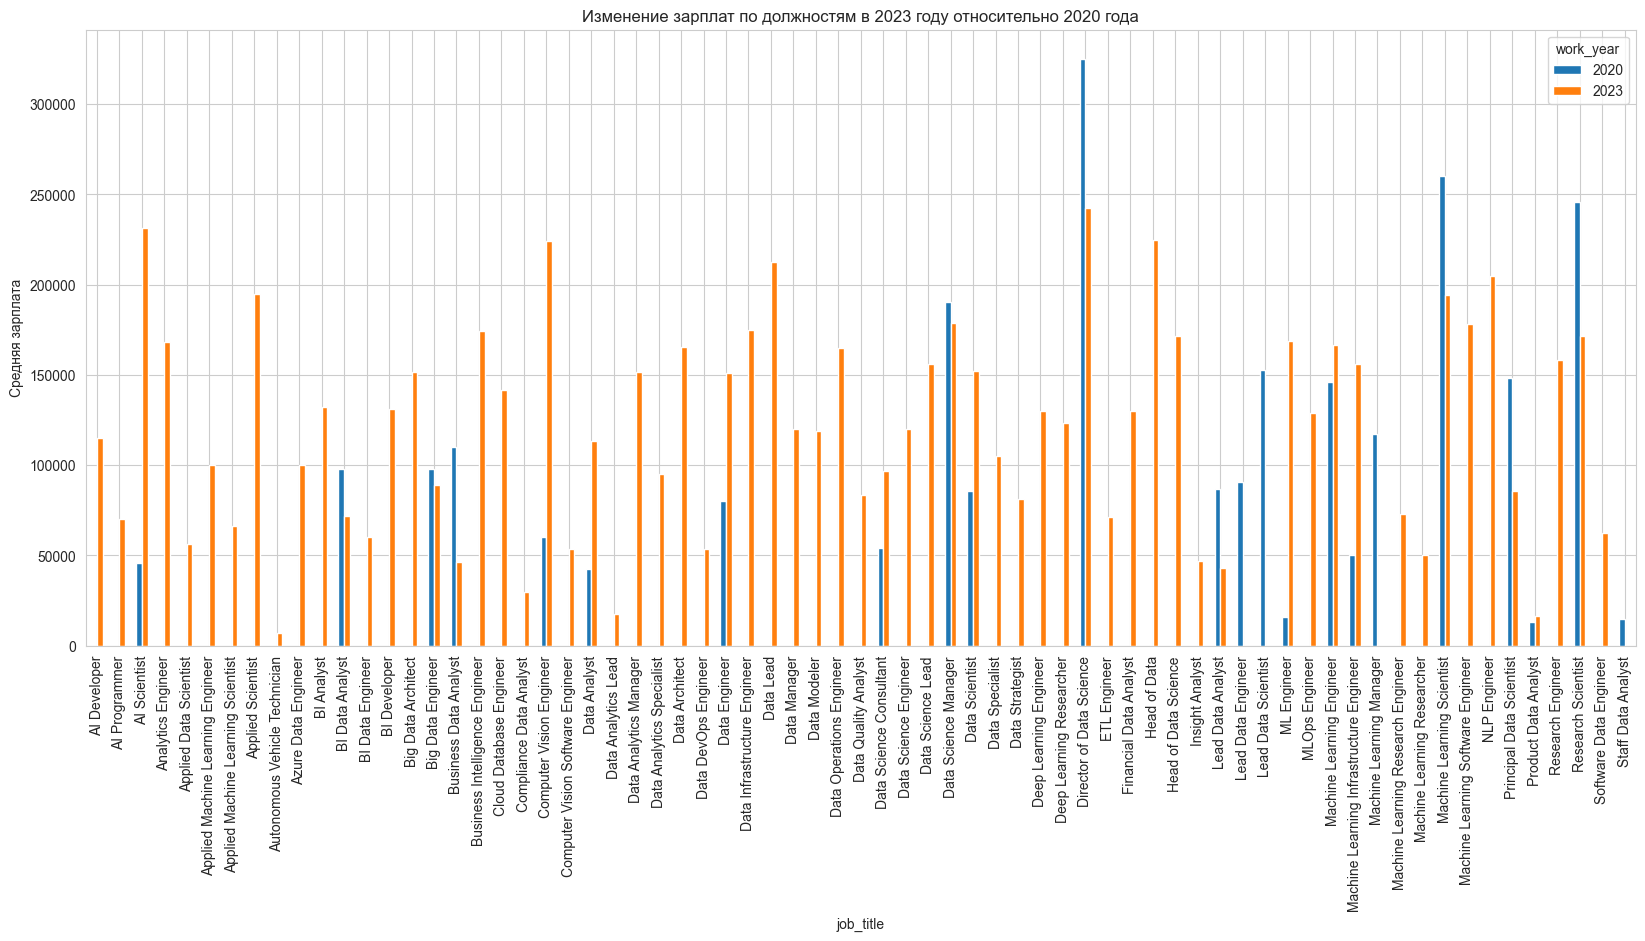

In [110]:
salary_change = df[df['work_year'].isin([2020, 2023])].groupby(['job_title', 'work_year'])['salary_in_usd'].mean().unstack()
print(salary_change)

salary_change.plot(kind='bar', figsize=(20, 8))
plt.title('Изменение зарплат по должностям в 2023 году относительно 2020 года')
plt.ylabel('Средняя зарплата')
plt.show()

### Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.

In [111]:
df.loc[df['salary'].idxmax()]

work_year                       2021
experience_level                  MI
employment_type                   FT
job_title             Data Scientist
salary                      30400000
salary_currency                  CLP
salary_in_usd                  40038
employee_residence                CL
remote_ratio                     100
company_location                  CL
company_size                       L
Name: 3669, dtype: object

### Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?

In [112]:
region_counts = df['employee_residence'].value_counts()
print(region_counts)

remote_work_ratio = df[df['remote_ratio'] > 0]['employee_residence'].value_counts(normalize=True) * 100
print(remote_work_ratio)

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64
employee_residence
US    65.951359
GB     4.792561
IN     4.291845
CA     3.934192
FR     2.503577
        ...    
MA     0.071531
CR     0.071531
IR     0.071531
CN     0.071531
MT     0.071531
Name: proportion, Length: 68, dtype: float64


### Оценка зарплат по уровню опыта

experience_level
EN     72648.685185
MI    101828.783133
SE    153897.435650
EX    191078.208333
Name: salary_in_usd, dtype: float64


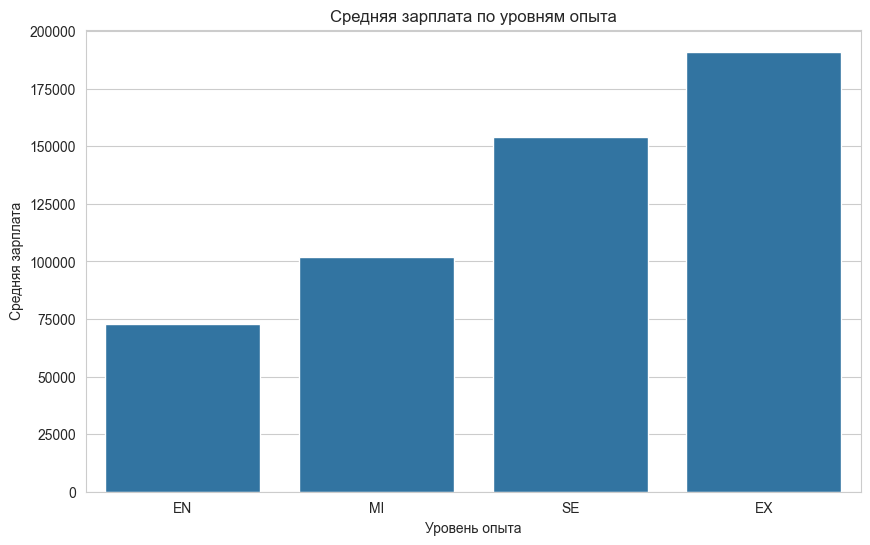

In [114]:
experience_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
print(experience_salary)

plt.figure(figsize=(10, 6))
sns.barplot(x=experience_salary.index, y=experience_salary.values)
plt.title('Средняя зарплата по уровням опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Средняя зарплата')
plt.show()